# **TESLA (TSLA) STOCK PRICE PREDICTION USING FACEBOOK PROPHET**

In order to predict the price of Tesla 30 days in advance, this script tends to produce a Facebook Prophet Machine learning model. Additionally, the performance of Tesla in the past is examined to determine how effectively the model worked. The following tasks are carried out in order to achieve the objective.

1. *Importing all required libraries*
2. *Importing the Yahoo Finance dataset*
3. *Utilizing Plotly express for data visualisation*
4. *Preparing Data for Modeling*
5. *Creating Facebook Prophet Model*
6. *Forecasting Stocks data for next 30 days*
7. *Downlaoding the predicted data*

## 1. Importing all required libraries

In [4]:
pip install fbprophet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 79.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 79.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 MB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 79.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 5.1 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for fbprophet
  Running set

In [9]:
# Importing libraries
import pandas as pd  #data analysis
import plotly.express as px # visualization
from prophet import Prophet #Forecasting
import prophet

In [10]:
#Initializing plotly
import plotly.io as pio
pio.renderers.default='colab'

## 2. Data gathering using Yahoo Finance

In order to download realtime stock dataset for TESLA. Go to yahoo finance and search for TSLA to see tesla's stock dataset or click [here](https://finance.yahoo.com/quote/TSLA/). Then click on historical data tab, then click on apply and then download the dataset file. Here, 1year 2year till 5 year data can easily be extarcted. The file will be downloaded in csv format.

In [13]:
stock_data_df= pd.read_csv('/content/TSLA.csv')
stock_data_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-07-06,681.710022,684.000000,651.400024,659.580017,659.580017,23284500
1,2021-07-07,664.270020,665.700012,638.320007,644.650024,644.650024,18792000
2,2021-07-08,628.369995,654.429993,620.460022,652.809998,652.809998,22773300
3,2021-07-09,653.179993,658.909973,644.690002,656.950012,656.950012,18140500
4,2021-07-12,662.200012,687.239990,662.159973,685.700012,685.700012,25927000
...,...,...,...,...,...,...,...
246,2022-06-27,748.099976,756.210022,727.700012,734.760010,734.760010,29726100
247,2022-06-28,733.450012,749.909973,697.030029,697.989990,697.989990,30130400
248,2022-06-29,691.500000,693.520020,666.820007,685.469971,685.469971,27632400
249,2022-06-30,673.530029,688.369995,656.590027,673.419983,673.419983,31533500


In [14]:
# To check minimum date
stock_data_df['Date'].min()

'2021-07-06'

In [17]:
# To check maximum date
stock_data_df['Date'].max()

'2022-07-01'

In [18]:
# To view dataframe information
stock_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       251 non-null    object 
 1   Open       251 non-null    float64
 2   High       251 non-null    float64
 3   Low        251 non-null    float64
 4   Close      251 non-null    float64
 5   Adj Close  251 non-null    float64
 6   Volume     251 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [19]:
# To view statisctical information
stock_data_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,868.191952,888.561551,845.794981,866.985375,866.985375,2.546814e+07
std,160.510480,165.062981,153.717128,159.428178,159.428178,9.007302e+06
min,623.849976,647.200012,620.460022,628.159973,628.159973,9.800600e+06
25%,723.480011,740.734985,708.889984,723.309998,723.309998,1.901000e+07
50%,851.450012,869.489990,825.159973,846.349976,846.349976,2.430100e+07
75%,1007.399994,1034.894959,984.920013,1009.825012,1009.825012,3.043895e+07
max,1234.410034,1243.489990,1217.000000,1229.910034,1229.910034,6.285210e+07


## 3. Data Visualization using plotly express

The visualization is conducted to assess TESLA's past performance. In this regard, three plotting methods are used:

1. Area graph
2. Line graph
3. Bar graph

In [20]:
px.area(stock_data_df, x='Date', y='Close') # Here, 'Close' denotes the price of the stocks

In [21]:
px.line(stock_data_df, x='Date', y='Close')

In [22]:
# This is the daily transactional volumne of data
px.area(stock_data_df, x='Date', y='Volume')

In [23]:
px.bar(stock_data_df, y='Volume')

In [24]:
# To analyze statistical data ( We dont need to specify x axis everytime)
px.box(stock_data_df, y='Close')

## 4. Data Preperation

In [25]:
stock_data_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-07-06,681.710022,684.000000,651.400024,659.580017,659.580017,23284500
1,2021-07-07,664.270020,665.700012,638.320007,644.650024,644.650024,18792000
2,2021-07-08,628.369995,654.429993,620.460022,652.809998,652.809998,22773300
3,2021-07-09,653.179993,658.909973,644.690002,656.950012,656.950012,18140500
4,2021-07-12,662.200012,687.239990,662.159973,685.700012,685.700012,25927000
...,...,...,...,...,...,...,...
246,2022-06-27,748.099976,756.210022,727.700012,734.760010,734.760010,29726100
247,2022-06-28,733.450012,749.909973,697.030029,697.989990,697.989990,30130400
248,2022-06-29,691.500000,693.520020,666.820007,685.469971,685.469971,27632400
249,2022-06-30,673.530029,688.369995,656.590027,673.419983,673.419983,31533500


In [26]:
# Creating new df with date and price column (Close is the Price and it is y , whereas, x is date)
columns= ['Date', 'Close']
new_stock_data_df= pd.DataFrame(stock_data_df, columns=columns)
new_stock_data_df

,Date,Close
0,2021-07-06,659.580017
1,2021-07-07,644.650024
2,2021-07-08,652.809998
3,2021-07-09,656.950012
4,2021-07-12,685.700012
...,...,...
246,2022-06-27,734.760010
247,2022-06-28,697.989990
248,2022-06-29,685.469971
249,2022-06-30,673.419983


In [27]:
# Renaming dataframe columns as per the requirement of Facebook Prophet model
prophet_df = new_stock_data_df.rename(columns={'Date': 'ds', 'Close':'y'})
prophet_df

,ds,y
0,2021-07-06,659.580017
1,2021-07-07,644.650024
2,2021-07-08,652.809998
3,2021-07-09,656.950012
4,2021-07-12,685.700012
...,...,...
246,2022-06-27,734.760010
247,2022-06-28,697.989990
248,2022-06-29,685.469971
249,2022-06-30,673.419983


## 5. Creating Facebook Prophet Model

In [28]:
# Initializing and fitting prophet model
model = Prophet()
model.fit(prophet_df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpltlzo29c/dh0037gq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpltlzo29c/i2rx0ydz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15558', 'data', 'file=/tmp/tmpltlzo29c/dh0037gq.json', 'init=/tmp/tmpltlzo29c/i2rx0ydz.json', 'output', 'file=/tmp/tmpltlzo29c/prophet_modelyj8j9y4a/prophet_model-20240909093236.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:32:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:32:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


## 6. Model Prediction/Forecasting

In [29]:
# Here, model will do forecasting for 1 month as dao=ily data is passed therefore, period=30 means, 30 days
future_data_prediction= model.make_future_dataframe(periods= 30)
forecast=model.predict(future_data_prediction)

In [35]:
forecast
# Here, yhat is the predicted value
# yhat_lower is the lower limit and yhat_upper is the upper limit


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-07-06,603.574659,479.392149,705.436468,603.574659,603.574659,-8.939252,-8.939252,-8.939252,-8.939252,-8.939252,-8.939252,0.0,0.0,0.0,594.635408
1,2021-07-07,606.689618,486.401111,717.082219,606.689618,606.689618,-6.863497,-6.863497,-6.863497,-6.863497,-6.863497,-6.863497,0.0,0.0,0.0,599.826121
2,2021-07-08,609.804577,490.638551,702.278468,609.804577,609.804577,-15.316795,-15.316795,-15.316795,-15.316795,-15.316795,-15.316795,0.0,0.0,0.0,594.487782
3,2021-07-09,612.919536,473.994207,702.865683,612.919536,612.919536,-19.723812,-19.723812,-19.723812,-19.723812,-19.723812,-19.723812,0.0,0.0,0.0,593.195724
4,2021-07-12,622.264413,512.990891,731.126811,622.264413,622.264413,-3.647595,-3.647595,-3.647595,-3.647595,-3.647595,-3.647595,0.0,0.0,0.0,618.616818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,2022-07-27,611.462193,496.778177,717.793529,603.951279,619.478073,-6.863497,-6.863497,-6.863497,-6.863497,-6.863497,-6.863497,0.0,0.0,0.0,604.598696
277,2022-07-28,608.619249,491.990228,708.765472,600.667675,617.026118,-15.316795,-15.316795,-15.316795,-15.316795,-15.316795,-15.316795,0.0,0.0,0.0,593.302454
278,2022-07-29,605.776305,476.486634,696.236311,597.362404,614.849271,-19.723812,-19.723812,-19.723812,-19.723812,-19.723812,-19.723812,0.0,0.0,0.0,586.052493
279,2022-07-30,602.933362,518.844579,740.589920,594.104650,612.524711,27.245446,27.245446,27.245446,27.245446,27.245446,27.245446,0.0,0.0,0.0,630.178807


In [31]:
px.line(forecast, x='ds', y='yhat')

#This means that the stock price will go down in next 30 days

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



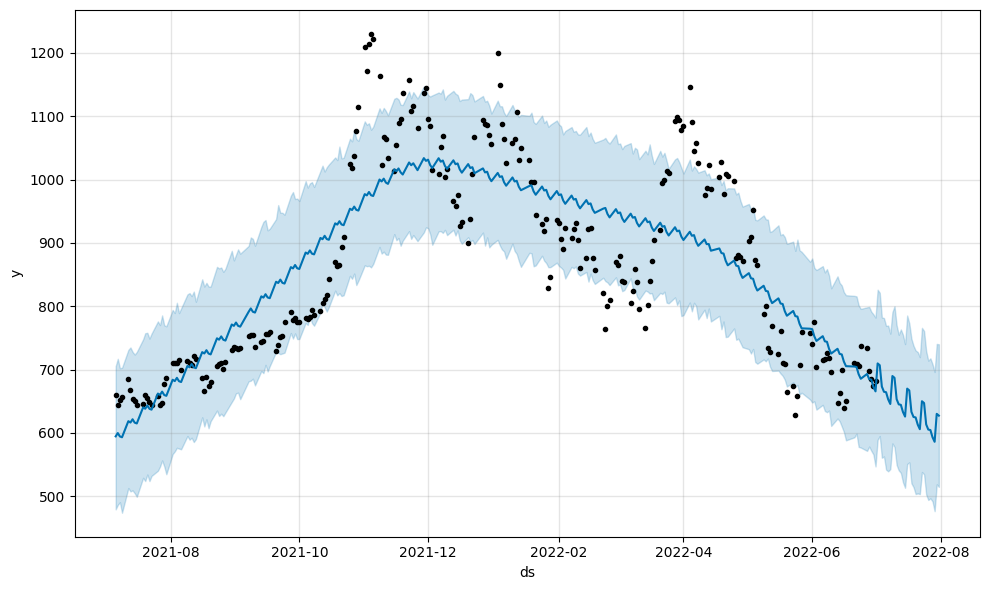

In [32]:
figure=model.plot(forecast,xlabel='ds', ylabel='y')
# Here black dots is tthe actual price of tesla and blue is the forecasted price

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:228: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



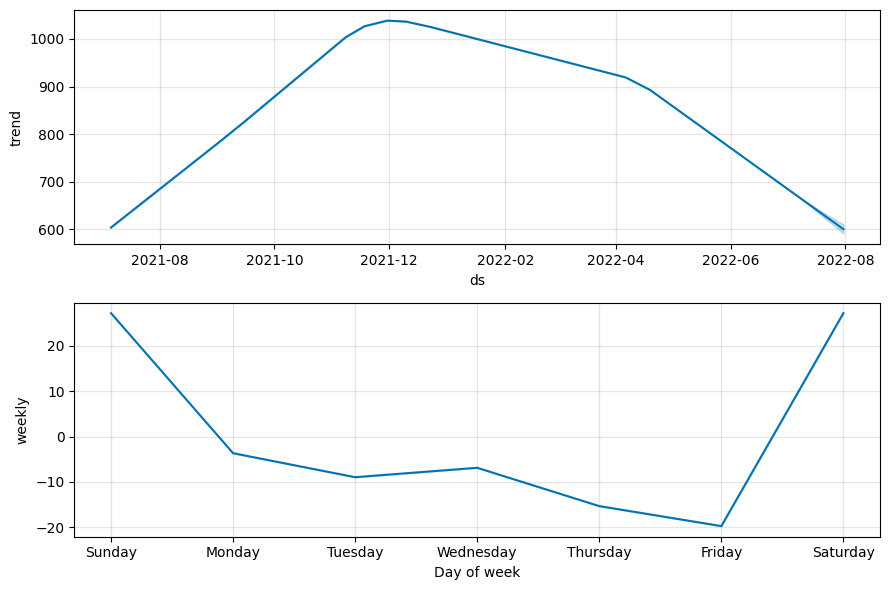

In [33]:
# Plotting weekly trend and overall trend
figure2=model.plot_components(forecast)


## 7. Downloading the Forecast data

In [34]:
# To download the forecasted file directly
from google.colab import files
forecast.to_csv("TESLA_stock_forecast.csv")
files.download('TESLA_stock_forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>